In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 28.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import statistics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from rdkit import Chem, RDLogger
from rdkit.Chem import Descriptors, AllChem
from rdkit.Chem import QED
RDLogger.DisableLog('rdApp.*')

In [ ]:
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

In [ ]:
def read_smiles(filename):
  with open(filename) as f:
    smiles = [s for s in f]
  return smiles

In [ ]:
smiles_1 = read_smiles('sampled_smiles_model_1.smi')
smiles_2 = read_smiles('finetuned_smiles.smi')
#smiles_3 = read_smiles('sampled_smiles_model_3.smi')

In [ ]:
def get_valid_smiles(smiles):
  valid = []
  for smi in smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
      valid.append(mol)
  print(f'Number of valid molecules generated: {len(valid)}')
  print(f'% of valid molecules generated: {len(valid)/len(smiles):.2%}')
  valid_smiles = [Chem.MolToSmiles(m, isomericSmiles=True, canonical=True, kekuleSmiles=True) for m in valid]
  return valid_smiles

In [ ]:
def get_unique_smiles(smiles):
  print(f'Number of unique molecules: {len(set(smiles))}')
  print(f'% of unique molecules: {len(set(smiles))/len(smiles):.2%}')
  return set(smiles)

In [ ]:
def get_novel_smiles(smiles, filename):
  novel_smiles = []
  with open(filename) as f:
    original_smiles = [s for s in f]
  for smi in smiles:
    if smi not in original_smiles:
      novel_smiles.append(smi)
  print(f'Number of novel molecules: {len(novel_smiles)}')
  print(f'% of novel molecules: {len(novel_smiles)/len(smiles):.2%}')
  return novel_smiles

###Первая модель

In [ ]:
valid_1 = get_valid_smiles(smiles_1)

Number of valid molecules generated: 790
% of valid molecules generated: 79.00%


In [ ]:
unique_1 = get_unique_smiles(valid_1)

Number of unique molecules: 789
% of unique molecules: 99.87%


In [ ]:
novel_1 = get_novel_smiles(unique_1, 'prepared_smiles.smi')

Number of novel molecules: 789
% of novel molecules: 100.00%


In [ ]:
descriptor_1 = {'smiles': [s for s in novel_1],
                'qed score': [Chem.QED.default(Chem.MolFromSmiles(s)) for s in novel_1],
                'sa score': [sascorer.calculateScore(Chem.MolFromSmiles(s)) for s in novel_1]}

In [ ]:
df1 = pd.DataFrame(descriptor_1)

In [ ]:
print(f'Mean QED: {statistics.mean(descriptor_1["qed score"])}')
print(f'Medan QED: {statistics.median(descriptor_1["qed score"])}')
print(f'Mode QED: {statistics.mode(descriptor_1["qed score"])}\n')
print(f'Mean SA: {statistics.mean(descriptor_1["sa score"])}')
print(f'Median SA: {statistics.median(descriptor_1["sa score"])}')
print(f'Mode SA: {statistics.mode(descriptor_1["sa score"])}')

Mean QED: 0.7480096322098035
Medan QED: 0.779911872468053
Mode QED: 0.8603726793543887

Mean SA: 2.811624402234712
Median SA: 2.776988097080027
Mode SA: 2.727604072383544


In [ ]:
sns.set()

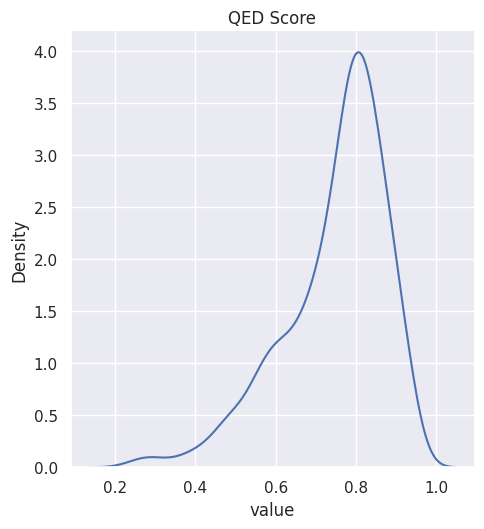

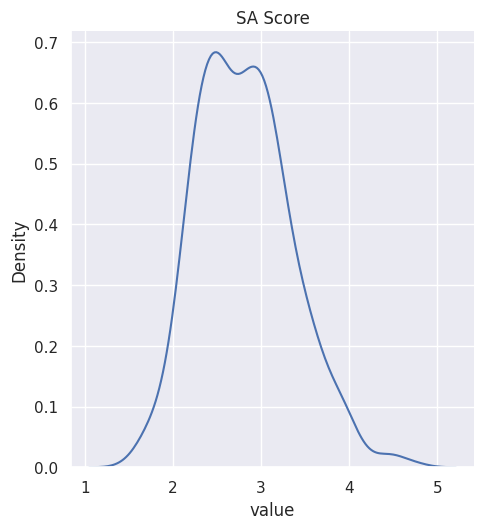

In [ ]:
sns.displot( x=descriptor_1['qed score'], kind = 'kde')
plt.title('QED Score')
plt.xlabel('value')
plt.show()

sns.displot(x=descriptor_1['sa score'], kind = 'kde')
plt.title('SA Score')
plt.xlabel('value')
plt.show()

###Вторая модель

In [ ]:
valid_2 = get_valid_smiles(smiles_2)

Number of valid molecules generated: 1000
% of valid molecules generated: 100.00%


In [ ]:
unique_2 = get_unique_smiles(smiles_2)

Number of unique molecules: 970
% of unique molecules: 97.00%


In [ ]:
novel_2 = get_novel_smiles(unique_2, 'zinc_smiles.smi')

Number of novel molecules: 968
% of novel molecules: 99.79%


In [ ]:
novel_2_1 = get_novel_smiles(novel_2, 'inhibitors_for_finetune.smi')

Number of novel molecules: 968
% of novel molecules: 100.00%


In [ ]:
descriptor_2 = {'smiles': [s for s in novel_2],
                'qed score': [Chem.QED.default(Chem.MolFromSmiles(s)) for s in novel_2],
                'sa score': [sascorer.calculateScore(Chem.MolFromSmiles(s)) for s in novel_2]}

In [ ]:
df2 = pd.DataFrame(descriptor_2)

In [ ]:
print(f'Mean QED: {statistics.mean(descriptor_2["qed score"])}')
print(f'Medan QED: {statistics.median(descriptor_2["qed score"])}')
print(f'Mode QED: {statistics.mode(descriptor_2["qed score"])}\n')
print(f'Mean SA: {statistics.mean(descriptor_2["sa score"])}')
print(f'Median SA: {statistics.median(descriptor_2["sa score"])}')
print(f'Mode SA: {statistics.mode(descriptor_2["sa score"])}')

Mean QED: 0.6940429788845343
Medan QED: 0.7251565176713628
Mode QED: 0.7910798020035001

Mean SA: 2.483463305850144
Median SA: 2.4158050013903125
Mode SA: 1.748908706838126


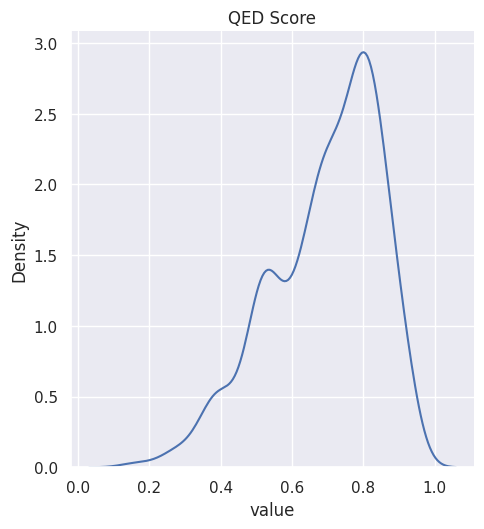

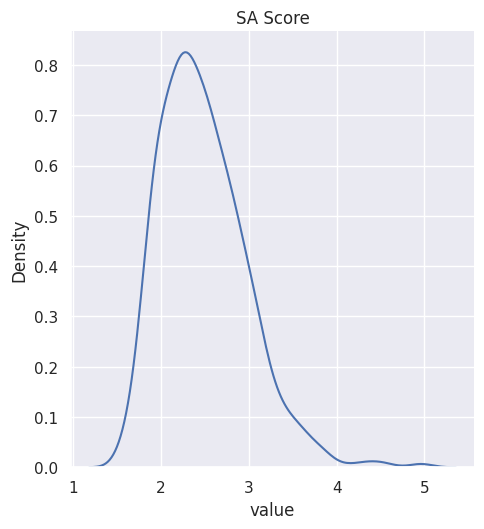

In [ ]:
sns.displot( x=descriptor_2['qed score'], kind = 'kde')
plt.title('QED Score')
plt.xlabel('value')
plt.show()

sns.displot(x=descriptor_2['sa score'], kind = 'kde')
plt.title('SA Score')
plt.xlabel('value')
plt.show()

###Третья модель

In [ ]:
valid_3 = get_valid_smiles(smiles_3)

Number of valid molecules generated: 240
% of valid molecules generated: 24.00%


In [ ]:
unique_3 = get_unique_smiles(valid_3)

Number of unique molecules: 239
% of unique molecules: 99.58%


In [ ]:
novel_3 = get_novel_smiles(unique_3, 'inhibitors_for_finetune.smi')

Number of novel molecules: 239
% of novel molecules: 100.00%


In [ ]:
descriptor_3 = {'qed score': [Chem.QED.default(Chem.MolFromSmiles(s)) for s in novel_3],
                'sa score': [sascorer.calculateScore(Chem.MolFromSmiles(s)) for s in novel_3]}

In [ ]:
print(f'Mean QED: {statistics.mean(descriptor_3["qed score"])}')
print(f'Medan QED: {statistics.median(descriptor_3["qed score"])}')
print(f'Mode QED: {statistics.mode(descriptor_3["qed score"])}\n')
print(f'Mean SA: {statistics.mean(descriptor_3["sa score"])}')
print(f'Median SA: {statistics.median(descriptor_3["sa score"])}')
print(f'Mode SA: {statistics.mode(descriptor_3["sa score"])}')

Mean QED: 0.7308809082311083
Medan QED: 0.7610541458222139
Mode QED: 0.7910798020035003

Mean SA: 2.801319251023395
Median SA: 2.7099416779818846
Mode SA: 1.748908706838126


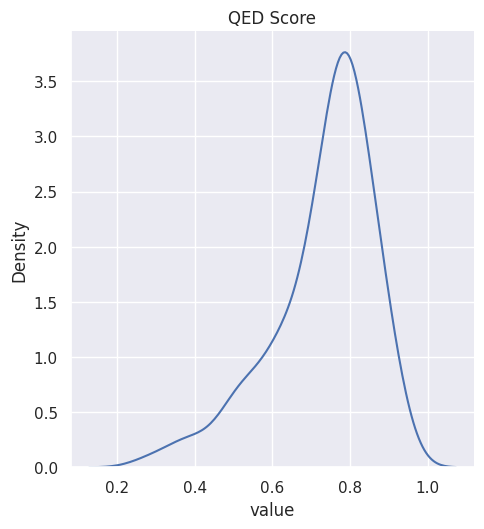

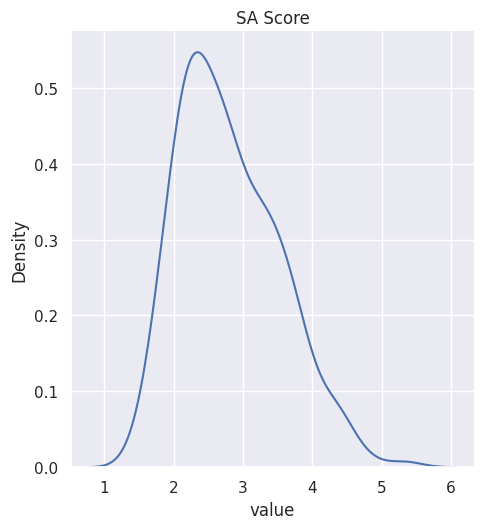

In [ ]:
sns.displot( x=descriptor_3['qed score'], kind = 'kde')
plt.title('QED Score')
plt.xlabel('value')
plt.show()

sns.displot(x=descriptor_3['sa score'], kind = 'kde')
plt.title('SA Score')
plt.xlabel('value')
plt.show()

###Получение топ-10 соединений по QED и SA для первых двух моделей

In [ ]:
df1_sorted = df1.sort_values(['qed score', 'sa score'], ascending = [False, True])[:10]

In [ ]:
df1_sorted

,smiles,qed score,sa score
132,C[C@H](N)C1=CN(CC2=C(F)C=C(Br)C=C2)N=C1,0.946626,2.741522
25,CCC1=C(C2=CC=CC=C2)N=C(N)C(S(C)(=O)=O)=C1Cl,0.945619,2.457813
351,CC1=CC(C)=C(CS(=O)(=O)C2=CC(F)=C(CO)C=C2)C=C1,0.944625,2.137572
727,CC1=C(NC(=O)[C@@H](C)N(C)C(=O)C2=CC=CC=N2)C(C)...,0.944153,2.524173
190,CC1=C(NC(=O)[C@@H](C)N(C)C(=O)C2=CC=CC=C2)C=CN1C,0.942440,2.765613
113,CC1=CC=C(C2=C(O)N([C@@H](C)C(=O)N(C)C)C=C2C)C=C1,0.941903,2.937096
612,CC1=CC=C(C(=O)NCC2=C(Cl)N(C)N=C2C)S1,0.941335,2.340649
171,CC1=CC(C(=O)N(C)[C@H](C)C2=C(C)ON=C2C)=C(C)N1,0.935982,3.251428
717,CC1=C([C@H](C)N)N=NN1C[C@H](C)C1=CC=C(Cl)C=C1,0.935032,3.266133
687,CC1=C(C)C=C(SC2=C(C(=O)O)C(C)=NN2C)N=C1,0.933570,2.708259


In [ ]:
df2_sorted = df2.sort_values(['qed score', 'sa score'], ascending = [False, True])[:10]

In [ ]:
df2_sorted

,smiles,qed score,sa score
254,CNC(=O)c1ccc(C)c(-c2ccccc2C(=O)N2CCCC2)c1\n,0.942766,1.874883
445,Cc1ccc2c(n1)NCCN2Cc1cccc(N(C)C)c1C\n,0.942290,2.676694
273,CCc1ccc2c(c1C)N(Cc1ccccc1)C(=O)C2CO\n,0.940842,2.912549
89,Cc1ccnc(N)c1C(=O)N1CCC[C@H]1C1=NC(c2ccccc2)=C1\n,0.938700,3.095308
259,CC(C)c1ncccc1NC(=O)c1cccc(N2CCCC2=O)n1\n,0.937917,2.448737
425,Cc1cc(CN(C)C(=O)c2cc(N)nc(C#N)c2)cs1\n,0.937003,2.819731
465,Cc1n[nH]c(C)c1C(=O)N(C)Cc1cccc(C2CC2)c1\n,0.936557,2.298365
957,CNCc1cccc(N(C)C(=O)c2cc(C)ccc2C)c1\n,0.932892,1.998753
161,Cc1cc(O)ccc1C(=O)N(C)[C@H](C)c1ccncc1\n,0.932591,2.591012
242,Cc1nc(C2CC2)cc(N(C)[C@H](C)c2cccc(O)c2)n1\n,0.931670,3.000378


In [ ]:
i=0
for smi in df1_sorted.smiles:
  i = i+1
  mol2 = Chem.MolFromSmiles(smi)
  mol3 = Chem.AddHs(mol2)
  params = AllChem.ETKDGv3()
  params.randomSeed = 0xf00d # optional random seed for reproduci
  AllChem.EmbedMolecule(mol3, params)
  with open(f'{i}_top_model_1.sdf', 'w') as f:
    f.write(Chem.MolToMolBlock(mol3))

In [ ]:
i=0
for smi in df2_sorted.smiles:
  i = i+1
  mol2 = Chem.MolFromSmiles(smi)
  mol3 = Chem.AddHs(mol2)
  params = AllChem.ETKDGv3()
  params.randomSeed = 0xf00d # optional random seed for reproduci
  AllChem.EmbedMolecule(mol3, params)
  with open(f'{i}_top_model_2.sdf', 'w') as f:
    f.write(Chem.MolToMolBlock(mol3))

In [ ]:
with open('top_ten_1.smi', 'w') as f:
  for smi in df1_sorted.smiles:
    f.write(smi + '\n')

In [ ]:
with open('top_ten_2.smi', 'w') as f:
  for smi in df2_sorted.smiles:
    f.write(smi + '\n')